<a href="https://colab.research.google.com/github/PieroPastor/qiskit_resume/blob/main/Qiskit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instalación Qiskit

Qiskit es un kit de desarrollo de software creado por IBM para trabajar con computadoras cuánticas a nivel de circuitos, pulsos y algoritmos.
https://qiskit.org/


In [1]:
!pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 11.1 MB/s eta 0:00:00


In [2]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=ff48133e7a378f359b9e1b0cf08276af6e0f3ac22cc36fd43a3a169ffc5c55cf
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


#Desarrollo

##Importación de librería (Qiskit 0.45.0)

In [3]:
import qiskit
from qiskit import QuantumCircuit
from qiskit import ClassicalRegister

In [4]:
import numpy as np

##Quantum Computing

Un qbit se representa mediante una matriz de estado. En esta matriz se almacenan las amplitudes, que son probabilidades a las probabilidades de que un bit colapse a 0 (α) y de que colapse a 1 (β).

Matriz de estado = [α, β]

Además se debe de cumplir la siguiente propiedad:

α^2 + β^2 = 1

En caso se tengán n qbits se tiene la siguiente matriz:

Matriz de estado = [p1, p2, p3, p4, ..., p(n*2)]

Por lo que la cantidad de combinaciones según el número de qbits es:

C = 2^n + 1

In [5]:
#Primer argumento es el número de qbit y el segundo es el número de cbits
n = 2
qc = QuantumCircuit(n, n) #n es el número de qbits

In [6]:
#Llena con un 'for' todos los qbits dentro del circuito
for i in range(n):
  initial_state = [0, 1]
  qc.initialize(initial_state, i)

In [7]:
from qiskit import BasicAer, execute
from qiskit.visualization import plot_bloch_multivector
from mpl_toolkits import mplot3d

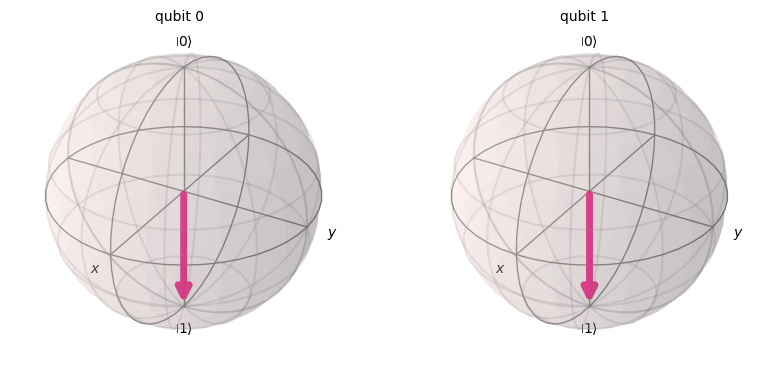

In [8]:
out = execute(qc, BasicAer.get_backend('statevector_simulator')).result().get_statevector()
plot_bloch_multivector(out)

###Compuerta X (NOT)

Negará el vector del qbit.
El proceso de negación se realiza multiplicando la matriz de estado del qbit con la matriz not (o matriz de negación).

\[
X = \begin{bmatrix}
0 & 1 \\
1 & 0 \\
\end{bmatrix}
\]

In [9]:
#Niega todos los qbits del circuito
for i in range(n):
  qc.x(i)

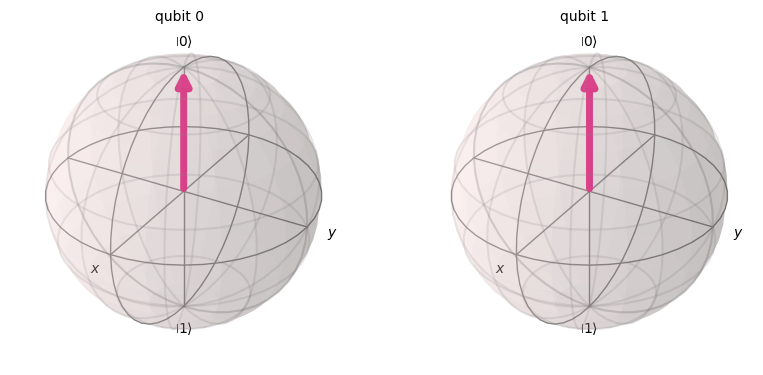

In [10]:
out = execute(qc, BasicAer.get_backend('statevector_simulator')).result().get_statevector()
plot_bloch_multivector(out)

###Compuerta Y

Realiza una rotación de 180 grados alrededor del eje Y en la esfera de Bloch.

La matriz de la compuerta Y en el contexto de las compuertas de Pauli es:

\[
Y = \begin{bmatrix}
0 & -i \\
i & 0 \\
\end{bmatrix}
\]

Aquí, \(i\) es la unidad imaginaria (\(i^2 = -1\)). La compuerta Y realiza una rotación de 180 grados alrededor del eje Y en la esfera de Bloch. Su representación matricial muestra cómo actúa sobre los estados cuánticos. Cuando se aplica a un qubit en el estado |0⟩, la compuerta Y multiplica el estado por \(i\), y cuando se aplica a un qubit en el estado |1⟩, multiplica el estado por \(-i\).

In [11]:
#Aplica la compuerta Y a todos los qbits
for i in range(n):
  qc.y(i)

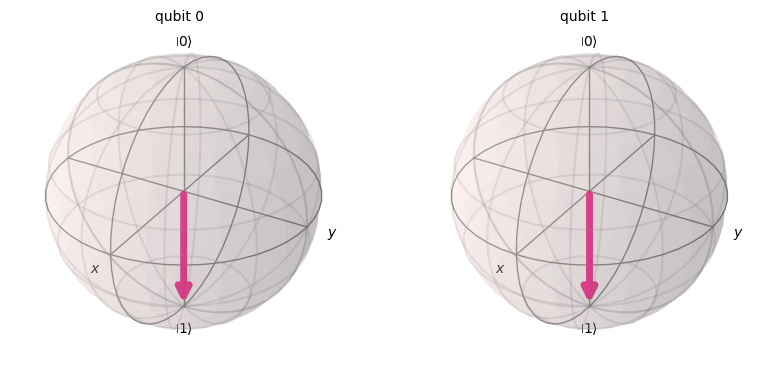

In [12]:
out = execute(qc, BasicAer.get_backend('statevector_simulator')).result().get_statevector()
plot_bloch_multivector(out)

###Compuerta Z

Introduce una fase de -1 cuando el qubit está en el estado |1⟩, no tiene efecto en el estado |0⟩.

La compuerta Z puede aplicarse a cualquier estado cuántico, ya sea que el qubit esté en el estado |0⟩, |1⟩, o en una superposición de ambos. La acción de la compuerta Z sobre un qubit en superposición involucra aplicar la fase de manera proporcional a las amplitudes de |0⟩ y |1⟩.

Matemáticamente, si tienes un qubit en superposición, representado como:

|ψ⟩ = α|0⟩ + β|1⟩

donde α y β son amplitudes complejas, al aplicar la compuerta Z, obtendrás:

Z|ψ⟩ = α|0⟩ - β|1⟩

Como puedes ver, la compuerta Z introduce una fase de \( -1 \) a la componente |1⟩ del estado cuántico, independientemente de las amplitudes α y β.

La compuerta Z es una puerta de un solo qubit, y su acción no depende del estado particular del qubit antes de aplicarla. Puede actuar sobre qubits en estados de base |0⟩, |1⟩ o en superposiciones de estos estados.

La compuerta Z es otra compuerta fundamental en computación cuántica y realiza una rotación de fase de 180 grados alrededor del eje Z en la esfera de Bloch. La representación matricial de la compuerta Z en la base computacional {|0⟩, |1⟩} es la siguiente:

\[ Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} \]


In [13]:
#Aplica la compuerta Z a todos los qbits
for i in range(n):
  qc.z(i)

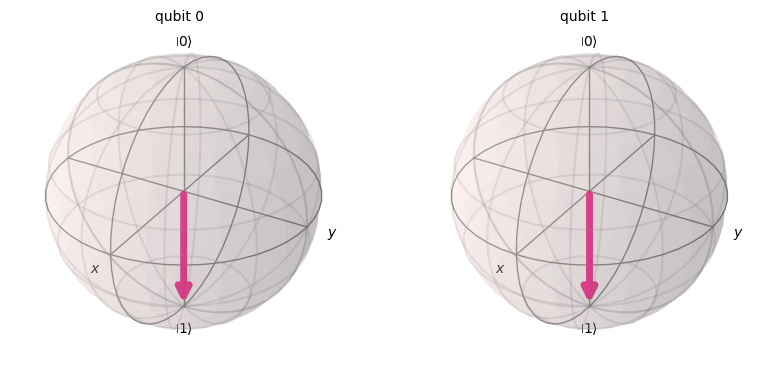

In [14]:
out = execute(qc, BasicAer.get_backend('statevector_simulator')).result().get_statevector()
plot_bloch_multivector(out)

###Compuerta Hadamard

Colocará al qbit en superposición. Este proceso de superponer un qbit se realiza al multiplicar la matriz de estado con la matriz Hadamard.
Matriz Hadamard = (1 \ sqrt(2)) * [[1, 1], [1, -1]]

In [15]:
#Aplica la compuerta Hadamard a todos los qbits
for i in range(n):
  qc.h(i)

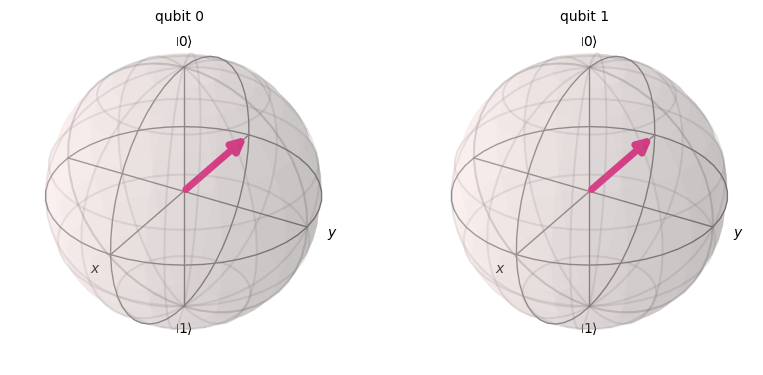

In [16]:
out = execute(qc, BasicAer.get_backend('statevector_simulator')).result().get_statevector()
plot_bloch_multivector(out)

###Compuerta de fases (S)

Introduce una fase de 𝒊 (raíz cuadrada de -1) cuando el qubit está en el estado |1⟩.

La compuerta S, también conocida como compuerta de fase \(S\), es una compuerta de un solo qubit en computación cuántica. Su matriz en la base computacional estándar {|0⟩, |1⟩} es la siguiente:

\[ S = \begin{bmatrix} 1 & 0 \\ 0 & i \end{bmatrix} \]

La compuerta \(S\) introduce una fase de \(i\) (la unidad imaginaria) al estado |1⟩, mientras deja inalterado el estado |0⟩. Matemáticamente, si tienes un qubit en el estado |ψ⟩ = α|0⟩ + β|1⟩, aplicar la compuerta \(S\) resultará en:

S|ψ⟩ = α|0⟩ + 𝒊β|1⟩

La compuerta \(S\) es una puerta de fase comúnmente utilizada en algoritmos cuánticos y operaciones de quantum gate, ya que modifica la fase de la amplitud asociada con el estado |1⟩.

In [17]:
#Aplica la compuerta S a todos los qbits
for i in range(n):
  qc.s(i)

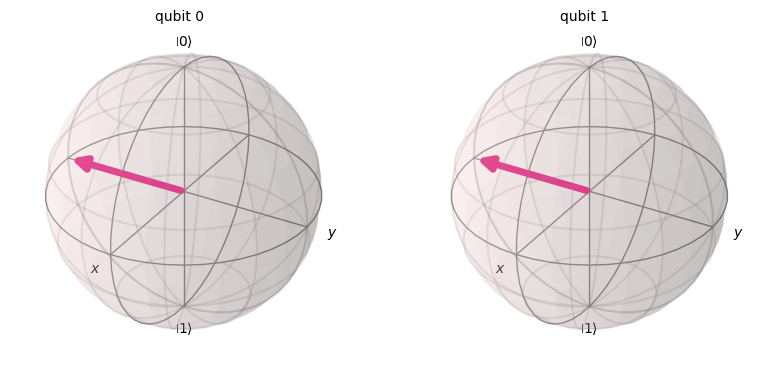

In [18]:
out = execute(qc, BasicAer.get_backend('statevector_simulator')).result().get_statevector()
plot_bloch_multivector(out)

###Compuerta T

Introduce una fase de e^(𝒊π/4) cuando el qubit está en el estado |1⟩.

La compuerta T, también conocida como compuerta de fase T, es otra compuerta de un solo qubit en computación cuántica. Su matriz en la base computacional estándar {|0⟩, |1⟩} es la siguiente:

\[ T = \begin{bmatrix} 1 & 0 \\ 0 & e^{iπ/4} \end{bmatrix} \]

La compuerta \(T\) introduce una fase de \(e^{iπ/4}\) al estado \(|1\rangle\), mientras deja inalterado el estado \(|0\rangle\). Matemáticamente, si tienes un qubit en el estado (|ψ⟩ = α|0⟩ + β|1⟩), aplicar la compuerta \(T\) resultará en:

T|ψ⟩ = α|0⟩ + e^{iπ/4}β|1⟩

La compuerta \(T\) es una puerta de fase que rota la fase de la amplitud asociada con el estado |1 en \(π/4\) radianes en sentido antihorario en la esfera de Bloch. Es una generalización de la compuerta \(S\) ya que \(S\) es un caso especial de \(T\) donde la fase es \(e^{i\pi/2} = i\).

In [19]:
#Aplica la compuerta T a todos los qbits
for i in range(n):
  qc.t(i)

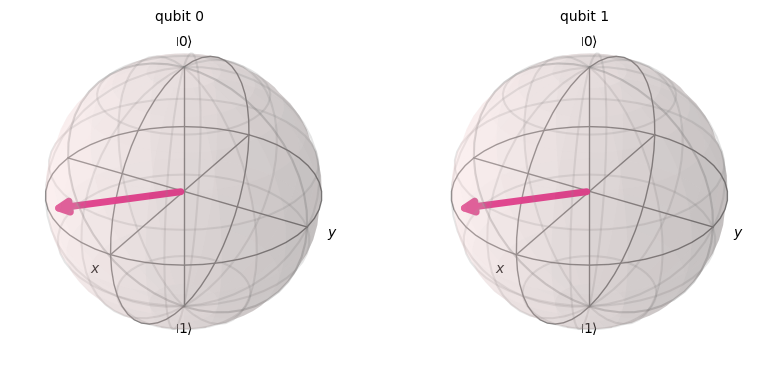

In [20]:
out = execute(qc, BasicAer.get_backend('statevector_simulator')).result().get_statevector()
plot_bloch_multivector(out)

###Compuerta CX (CNOT)

La compuerta CNOT (Controlled-NOT) en computación cuántica es una compuerta de dos qubits que realiza una operación XOR controlada entre el qubit de control y el qubit objetivo. La acción de la compuerta CNOT se describe de la siguiente manera:

- Si el qubit de control está en el estado |1⟩, se aplica una compuerta X (NOT) al qubit objetivo.
- Si el qubit de control está en el estado |0⟩, no ocurre ningún cambio en el qubit objetivo.

Matemáticamente, la compuerta CNOT se puede representar con la siguiente matriz en la base computacional {|00⟩, |01⟩, |10⟩, |11⟩}:

\[ CNOT = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{bmatrix} \]

In [21]:
#Aplica la compuerta CNOT a todos los qbits
for i in range(n-1):
  qc.cx(i, i+1) #El primer argumento es el qbit de control para que se realice la "negación" y el otro es el qbit que podría cambiar, ambos deben pertenecer al mismo circuito
#También se puede usar el método que requerirá de un qbit que ya no necesariamente tiene que estar en el mismi circuito. Se consigue el qbit del circuito con el método del primer argumento
qc.cnot(qc.qbit_argument_conversion(0), 1)

<ipython-input-21-a2ea6488aa31>:5: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  qc.cnot(qc.qbit_argument_conversion(0), 1)


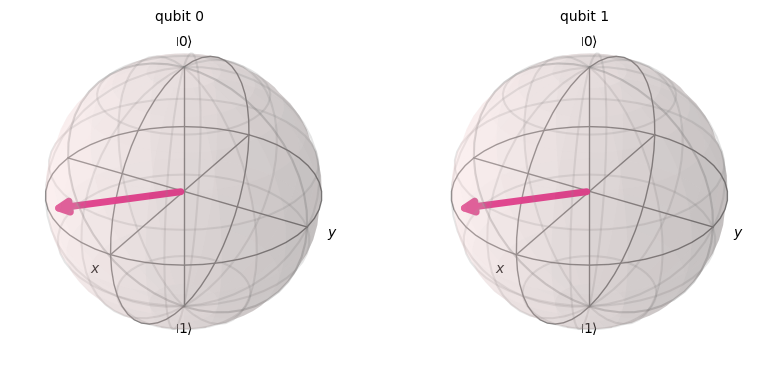

In [22]:
out = execute(qc, BasicAer.get_backend('statevector_simulator')).result().get_statevector()
plot_bloch_multivector(out)

###Compuerta SWAP

La compuerta SWAP (intercambio) en computación cuántica intercambia los estados de dos qubits. La matriz de la compuerta SWAP en la base computacional {|00⟩, |01⟩, |10⟩, |11⟩} es la siguiente:

\[ \text{SWAP} = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \end{bmatrix} \]

Esta matriz realiza el intercambio de los estados |01⟩ y |10⟩, mientras que deja los estados |00⟩ y |11⟩ sin cambios. La representación matricial de la compuerta SWAP es simétrica y refleja la operación de intercambio que realiza.

La compuerta SWAP es útil en algoritmos cuánticos y circuitos cuánticos cuando es necesario intercambiar información entre qubits. También es utilizada en la implementación de operaciones de cúbits en ciertos tipos de arquitecturas cuánticas.

In [23]:
#Aplica la compuerta SWAP a todos los qbits
for i in range(n-1):
  qc.swap(i, i+1)

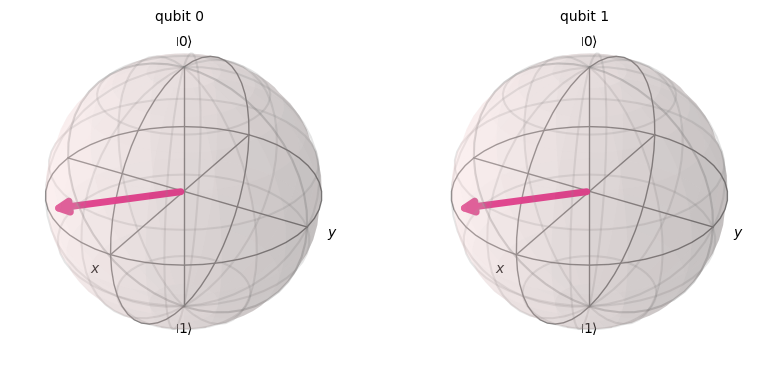

In [24]:
out = execute(qc, BasicAer.get_backend('statevector_simulator')).result().get_statevector()
plot_bloch_multivector(out)

###Compuerta RX

La compuerta \(X\) en la notación \(RX\) se refiere a una rotación en el eje \(X\) en la esfera de Bloch y no a la compuerta NOT clásica. La matriz de la compuerta \(RX\) en la base computacional {|0⟩, |1⟩} es la siguiente:

[ RX(θ) = \begin{bmatrix} \cos(\frac{\theta}{2}) & -i \sin(\frac{\theta}{2}) \\ -i \sin(\frac{\theta}{2}) & \cos(\frac{\theta}{2}) \end{bmatrix} ]

Aquí, θ es el ángulo de rotación alrededor del eje \(X\). Esta compuerta realiza una rotación del qubit alrededor del eje \(X\) en la esfera de Bloch por un ángulo θ.

Por ejemplo, si θ = π, la matriz sería:

[ RX(π)  \begin{bmatrix} 0 & -i \\ -i & 0 \end{bmatrix} \]

Y si θ = π/2, la matriz sería:

\[ RX(π/2) = 1/sqrt(2) * \begin{bmatrix} 1 & -i \\ -i & 1 \end{bmatrix} \]

Estas rotaciones en el eje \(X\) son fundamentales en muchos algoritmos y operaciones cuánticas. La compuerta \(RX\) es una de las compuertas de un solo qubit utilizadas en computación cuántica.

In [25]:
#Aplica la compuerta RX a todos los qbits
for i in range(n):
  qc.rx(np.pi/3, i) #Primer argumento es el ángulo Theta y el segundo el qbit

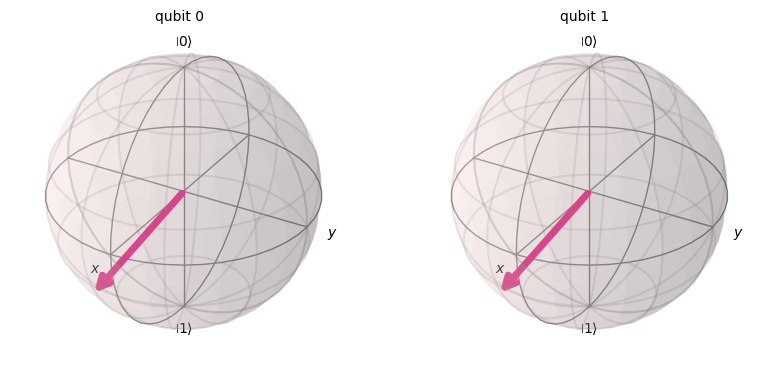

In [26]:
out = execute(qc, BasicAer.get_backend('statevector_simulator')).result().get_statevector()
plot_bloch_multivector(out)

###Compuerta RY

La compuerta \(Y\) en la notación \(RY\) se refiere a una rotación en el eje \(Y\) en la esfera de Bloch. La matriz de la compuerta \(RY\) en la base computacional {|0⟩, |1⟩} es la siguiente:

[ RY(θ) = \begin{bmatrix} \cos(\frac{\theta}{2}) & - \sin(\frac{\theta}{2}) \\  \sin(\frac{\theta}{2}) & \cos(\frac{\theta}{2}) \end{bmatrix} ]

Aquí, θ es el ángulo de rotación alrededor del eje \(Y\). Esta compuerta realiza una rotación del qubit alrededor del eje \(Y\) en la esfera de Bloch por un ángulo θ.

Por ejemplo, si θ = π, la matriz sería:

[ RY(π)  \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix} \]

Y si θ = π/2, la matriz sería:

\[ RY(π/2) = 1/sqrt(2) * \begin{bmatrix} 1 & -1 \\ 1 & 1 \end{bmatrix} \]

Estas rotaciones en el eje \(Y\) son fundamentales en muchos algoritmos y operaciones cuánticas. La compuerta \(RY\) es una de las compuertas de un solo qubit utilizadas en computación cuántica.

In [27]:
#Aplica la compuerta RY a todos los qbits
for i in range(n):
  qc.ry(np.pi/3, i) #Primer argumento es el ángulo Theta y el segundo el qbit

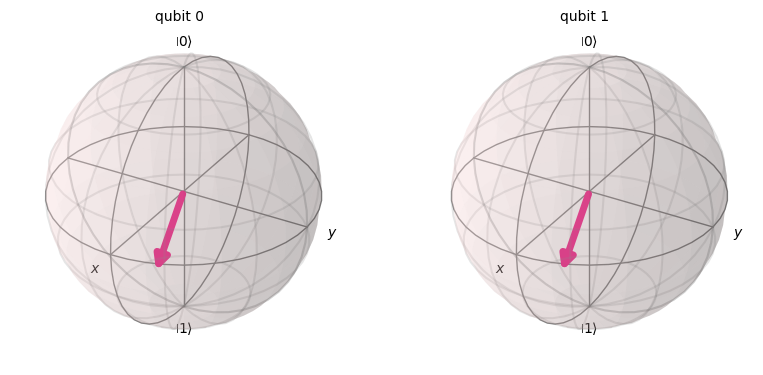

In [28]:
out = execute(qc, BasicAer.get_backend('statevector_simulator')).result().get_statevector()
plot_bloch_multivector(out)

###Compuerta RZ

La compuerta RZ(𝜙) en computación cuántica es una compuerta de un solo qubit que realiza una rotación alrededor del eje Z en la esfera de Bloch. La matriz correspondiente en la base computacional {|0⟩, |1⟩} es la siguiente:

\[ RZ(𝜙) = \begin{bmatrix} e^{-i\phi/2} & 0 \\ 0 & e^{i\phi/2} \end{bmatrix} \]

Aquí, (𝜙) es el ángulo de rotación alrededor del eje Z. Esta compuerta realiza una rotación alrededor del eje Z por un ángulo (𝜙).

Por ejemplo, si 𝜙 = π, la matriz sería:

\[ RZ(π) = \begin{bmatrix} -i & 0 \\ 0 & i \end{bmatrix} \]

Y si 𝜙 = π/2, la matriz sería:

\[ RZ(π/2) = \begin{bmatrix} e^{-i\pi/4} & 0 \\ 0 & e^{i\pi/4} \end{bmatrix} \]

Esta compuerta \(RZ\) es una de las compuertas de rotación fundamentales en la computación cuántica y se utiliza para manipular los estados de qubits en algoritmos y circuitos cuánticos.

In [29]:
#Aplica la compuerta RX a todos los qbits
for i in range(n):
  qc.rz(np.pi/3, i) #Primer argumento es el ángulo Phi y el segundo el qbit

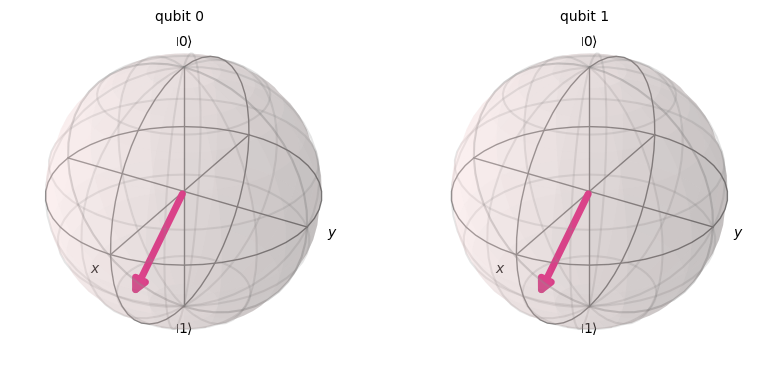

In [30]:
out = execute(qc, BasicAer.get_backend('statevector_simulator')).result().get_statevector()
plot_bloch_multivector(out)

###Compuerta 𝐼

La compuerta \(𝐼\) en computación cuántica es la compuerta de identidad, que es una operación trivial que no realiza ninguna rotación ni cambio en el estado cuántico del qubit. La matriz de la compuerta de identidad en la base computacional {|0⟩, |1⟩} es la siguiente:

\[ 𝐼 = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \]

Esta matriz simplemente deja inalterado el estado del qubit. Al aplicar la compuerta de identidad a un qubit, el estado cuántico se mantiene sin cambios:

𝐼|0⟩ = |0⟩
𝐼|1⟩ = |1⟩

La compuerta de identidad es importante en la construcción de circuitos cuánticos y algoritmos cuánticos, ya que actúa como un marcador de posición y se utiliza para mantener o introducir pausas en las secuencias de compuertas.

In [31]:
#Aplica la compuerta I a todos los qbits
for i in range(n):
  qc.i(i)

<ipython-input-31-6e5c90430281>:3: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.i()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.id as direct replacement.
  qc.i(i)


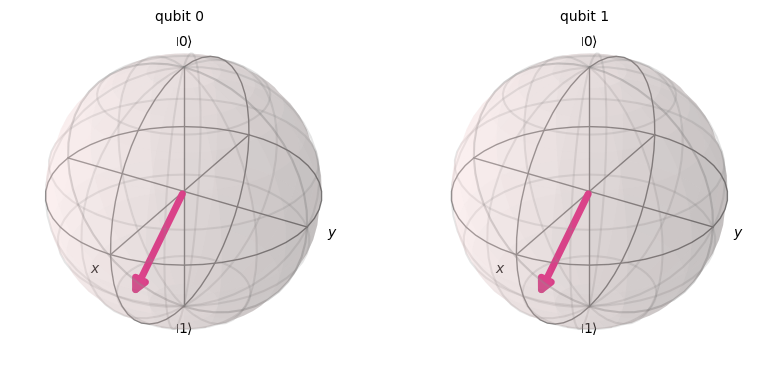

In [32]:
out = execute(qc, BasicAer.get_backend('statevector_simulator')).result().get_statevector()
plot_bloch_multivector(out)

###Compuerta 𝑈

La compuerta 𝑈 realiza variaciones en los ángulos de cada qbit. Al usarse tres ángulos distintos; la compuerta 𝑈 será la "fusión" de las matrices {𝑈1, 𝑈2, 𝑈3}. Y será igual que 𝑈3 que será quien englobe tanto 𝑈1 como 𝑈2.

####𝑈1

La compuerta 𝑈1(λ) es una compuerta cuántica de un solo qubit que introduce una fase global al estado |1⟩. La matriz de la compuerta 𝑈1(λ) en la base computacional {|0⟩, |1⟩} es la siguiente:

\[ 𝑈1(λ) = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\lambda} \end{bmatrix} \]

Aquí, λ es el parámetro que determina la cantidad de fase que se aplica al estado |1⟩. La compuerta 𝑈1(λ) no afecta el estado |0⟩

Similar a la compuerta de fase que mencioné anteriormente, la compuerta 𝑈1 permite introducir una fase global a un estado cuántico y es utilizada en diversos algoritmos cuánticos y circuitos cuánticos para manipular las fases de los estados cuánticos.

Por ejemplo, si λ = π, la matriz sería:

\[ 𝑈1(π) = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} \]

Y si λ = π/2, la matriz sería:

\[ 𝑈1(π/2) = \begin{bmatrix} 1 & 0 \\ 0 & i \end{bmatrix} \]

Esta compuerta 𝑈1 es una generalización de la compuerta de fase y puede ser utilizada para introducir cualquier fase deseada al estado |1⟩.

####𝑈2

La compuerta 𝑈1 es una compuerta cuántica de un solo qubit que realiza una rotación en la esfera de Bloch. La matriz de la compuerta \(U2\) en la base computacional {|0⟩, |1⟩} es la siguiente:

\[ 𝑈2(𝛷, λ) = 1/sqrt(2) \begin{bmatrix} 1 & -e^{i\lambda} \\ e^{i\phi} & e^{i(\phi + \lambda)} \end{bmatrix} \]

Aquí, 𝛷 y λ son parámetros que determinan los ángulos de rotación en los ejes de la esfera de Bloch. La compuerta 𝑈2 generaliza las compuertas 𝑈1 y 𝑈3, y su forma matricial permite una amplia gama de rotaciones.

Por ejemplo, si 𝛷 = π y λ = π/2, la matriz sería:

\[ 𝑈2(π, π/2) = 1/sqrt(2) \begin{bmatrix} 1 & -\frac{1}{\sqrt{2}} \\ i & \frac{i}{\sqrt{2}} \end{bmatrix} \]

La compuerta 𝑈2 es una puerta versátil que se utiliza para realizar rotaciones arbitrarias en la esfera de Bloch. Es parte de la familia de compuertas de un solo qubit en la computación cuántica.

####𝑈3 = 𝑈

La matriz general para la compuerta 𝑈 en Qiskit, también conocida como 𝑈3(𝛳, 𝛷, λ), es la siguiente:

\[ 𝑈(𝛳, 𝛷, λ) = \begin{bmatrix} \cos\left(\frac{\theta}{2}\right) & -e^{i\lambda}\sin\left(\frac{\theta}{2}\right) \\ e^{i\phi}\sin\left(\frac{\theta}{2}\right) & e^{i(\phi+\lambda)}\cos\left(\frac{\theta}{2}\right) \end{bmatrix} \]

Esta matriz representa una rotación en el espacio cuántico y puede generalizar las compuertas 𝑈1, 𝑈2, y 𝑈3. Los parámetros 𝛳, 𝛷, y λ determinan los ángulos de rotación alrededor de los ejes en la esfera de Bloch.

Cuando los parámetros específicos son elegidos, la compuerta 𝑈 puede reducirse a cualquiera de las compuertas específicas 𝑈1, 𝑈2, o 𝑈3. Por ejemplo, si 𝛳 = 𝛷, entonces 𝑈 se reduce a 𝑈2.

La compuerta 𝑈 es una herramienta poderosa y flexible en Qiskit que puede utilizarse para construir circuitos cuánticos más generales y personalizados.

In [33]:
#Aplica la compuerta U a todos los qbits
for i in range(n):
  qc.u(np.pi/3, np.pi, np.pi/2, i) #Primer argumento es el ángulo Theta, el segundo Phi, el tercero Lambda y el último el qbit

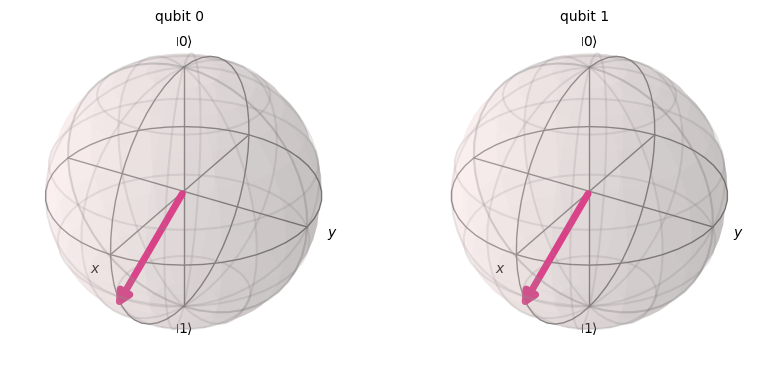

In [34]:
out = execute(qc, BasicAer.get_backend('statevector_simulator')).result().get_statevector()
plot_bloch_multivector(out)

###Gráfica de probabilidades

In [35]:
from qiskit.visualization import plot_histogram

In [36]:
#Colapsa todos los qbits como un solo circuito
qc.measure_all()

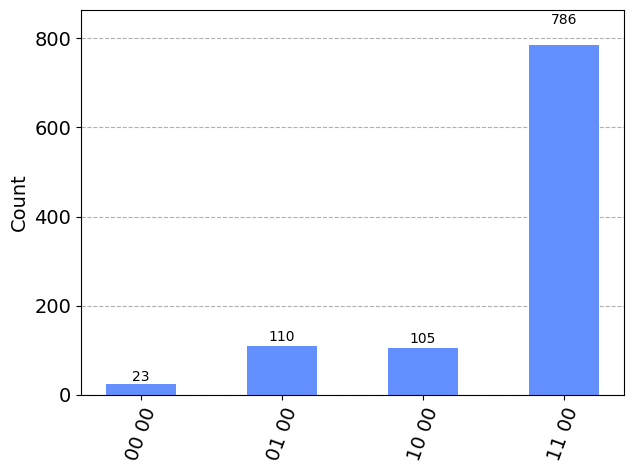

In [37]:
results = execute(qc, BasicAer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(results)

###Mostrar circuito

In [38]:
import pylatexenc

In [39]:
qc.draw(output='text')

┌─────────────────┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐             »
   q_0: ┤ Initialize(0,1) ├┤ X ├┤ Y ├┤ Z ├┤ H ├┤ S ├┤ T ├──■────■───X─»
        ├─────────────────┤├───┤├───┤├───┤├───┤├───┤├───┤┌─┴─┐┌─┴─┐ │ »
   q_1: ┤ Initialize(0,1) ├┤ X ├┤ Y ├┤ Z ├┤ H ├┤ S ├┤ T ├┤ X ├┤ X ├─X─»
        └─────────────────┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘   »
   c: 2/══════════════════════════════════════════════════════════════»
                                                                      »
meas: 2/══════════════════════════════════════════════════════════════»
                                                                      »
«        ┌─────────┐┌─────────┐┌─────────┐┌───┐┌──────────────┐ ░ ┌─┐   
«   q_0: ┤ Rx(π/3) ├┤ Ry(π/3) ├┤ Rz(π/3) ├┤ I ├┤ U(π/3,π,π/2) ├─░─┤M├───
«        ├─────────┤├─────────┤├─────────┤├───┤├──────────────┤ ░ └╥┘┌─┐
«   q_1: ┤ Rx(π/3) ├┤ Ry(π/3) ├┤ Rz(π/3) ├┤ I ├┤ U(π/3,π,π/2) ├─░──╫─┤M├
«        └─────────┘└─────────┘└─────────┘└───┘└──────────────┘ ░  ║ └╥┘
«   c: 2/══════════════════════════════════════════════════════════╬══╬═
«                                                                  ║  ║ 
«meas: 2/══════════════════════════════════════════════════════════╩══╩═
«                                                                  0  1